* `Importing the libraries`

In [140]:
## Major
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import re
import string
from tqdm import tqdm
import joblib
import os

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## sklearn -- for processing and models
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## SMOTE for imblanced dataset
from imblearn.over_sampling import SMOTE

# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords


* `Reading data`

In [141]:
FILEPATH = os.path.join(os.getcwd(), '..', 'data', 'twitter-sanders-apple3.csv')
df = pd.read_csv(FILEPATH)
df.head()

,class,text
0,Pos,Now all @Apple has to do is get swype on the iphone and it will be crack. Iphone that is
1,Pos,@Apple will be adding more carrier support to the iPhone 4S (just announced)
2,Pos,Hilarious @youtube video - guy does a duet with @apple 's Siri. Pretty much sums up the love affair! http://t.co/8ExbnQjY
3,Pos,@RIM you made it too easy for me to switch to @Apple iPhone. See ya!
4,Pos,I just realized that the reason I got into twitter was ios5 thanks @apple


* `EDA`

In [142]:
df.shape

(988, 2)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   988 non-null    object
 1   text    988 non-null    object
dtypes: object(2)
memory usage: 15.6+ KB


In [144]:
df['class'].value_counts()

class
Neutral    509
Neg        316
Pos        163
Name: count, dtype: int64

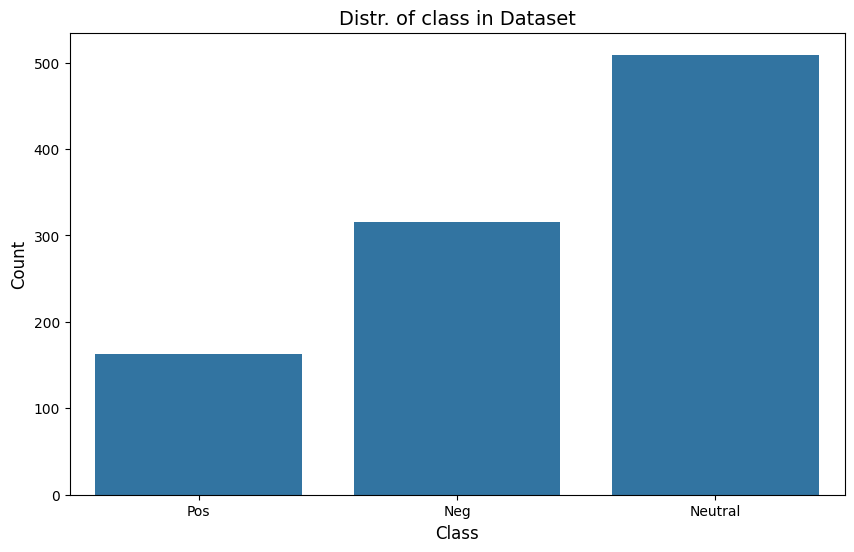

In [145]:
## countplot of target
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='class')
plt.title('Distr. of class in Dataset', fontsize=14, c='k')
plt.xlabel('Class', c='k', fontsize=12)
plt.ylabel('Count', c='k', fontsize=12)
plt.show()

---

* `Text Cleaning & Viz`

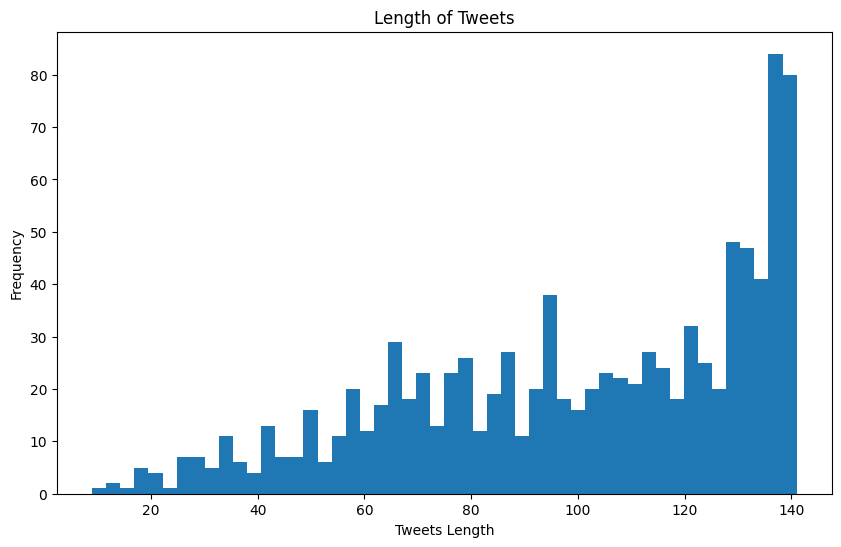

In [146]:
length_tweets = df['text'].str.len()
## Plotting
plt.figure(figsize=(10, 6))
plt.hist(length_tweets, bins=50)
plt.title('Length of Tweets')
plt.xlabel('Tweets Length')
plt.ylabel('Frequency')
plt.show()

In [147]:
# Hashtags
def hashtag_extract(x):
    hashtags = []
    ## Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

# Extracting hashtags for each class
hash_neg = hashtag_extract(df[df['class']=='Neg']['text'])  # Negative Hashtags
hash_neu = hashtag_extract(df[df['class']=='Neutral']['text'])  # Neutral Hashtags
hash_pos = hashtag_extract(df[df['class']=='Pos']['text'])  # Positive Hashtags

# Unnesting the lists
hash_neg = sum(hash_neg, [])
hash_pos = sum(hash_pos, [])
hash_neu = sum(hash_neu, [])

hash_neg

['iOS5',
 'iTunesMatch',
 'Siri',
 'fail',
 'fb',
 'iphone',
 'ripstevejobs',
 'thenonsensepersists',
 'neednewipadguide',
 'fatfuckingchance',
 'wifi',
 'bug',
 'destroying',
 'productivity',
 'frustrated',
 'iOS5',
 'whaddupwitdat',
 'custserv',
 'now',
 'iPad',
 'iOS5',
 'AT',
 'apple',
 'iphone',
 '4S',
 'fail',
 'iOS5',
 'expensivepaperweight',
 'DontBeMadAtMeBecause',
 'Android',
 'apple',
 'mouse',
 'buttery',
 'happy',
 'macworld',
 'iPhone4',
 'fuckingpissed',
 'fail',
 'iOS',
 'andshuttingdownru',
 'andshuttingdownrunningprograms',
 'nohelp',
 'icloud',
 'dropbox',
 'Newton',
 'iCloud',
 'iOS5',
 'iOS5atemydingo',
 'iphone4s',
 'crankywithnophone',
 'iphone',
 'help',
 'Siri',
 'ugh',
 'iOS5',
 '3GS',
 'needsomethingtoread',
 'iPhone',
 'iOS5',
 'useless',
 'nopatience',
 'iOS5',
 'FAIL',
 'ios5downgrade',
 'timewarnercable',
 'iCloud',
 'OSX',
 'iOS5',
 'fail',
 'Siri',
 'Siri',
 'Siri',
 'Siri',
 'iphone',
 'ipod',
 'Siri',
 'iPhone4s',
 'Fail',
 'iphone',
 'annoyed',
 'iCl

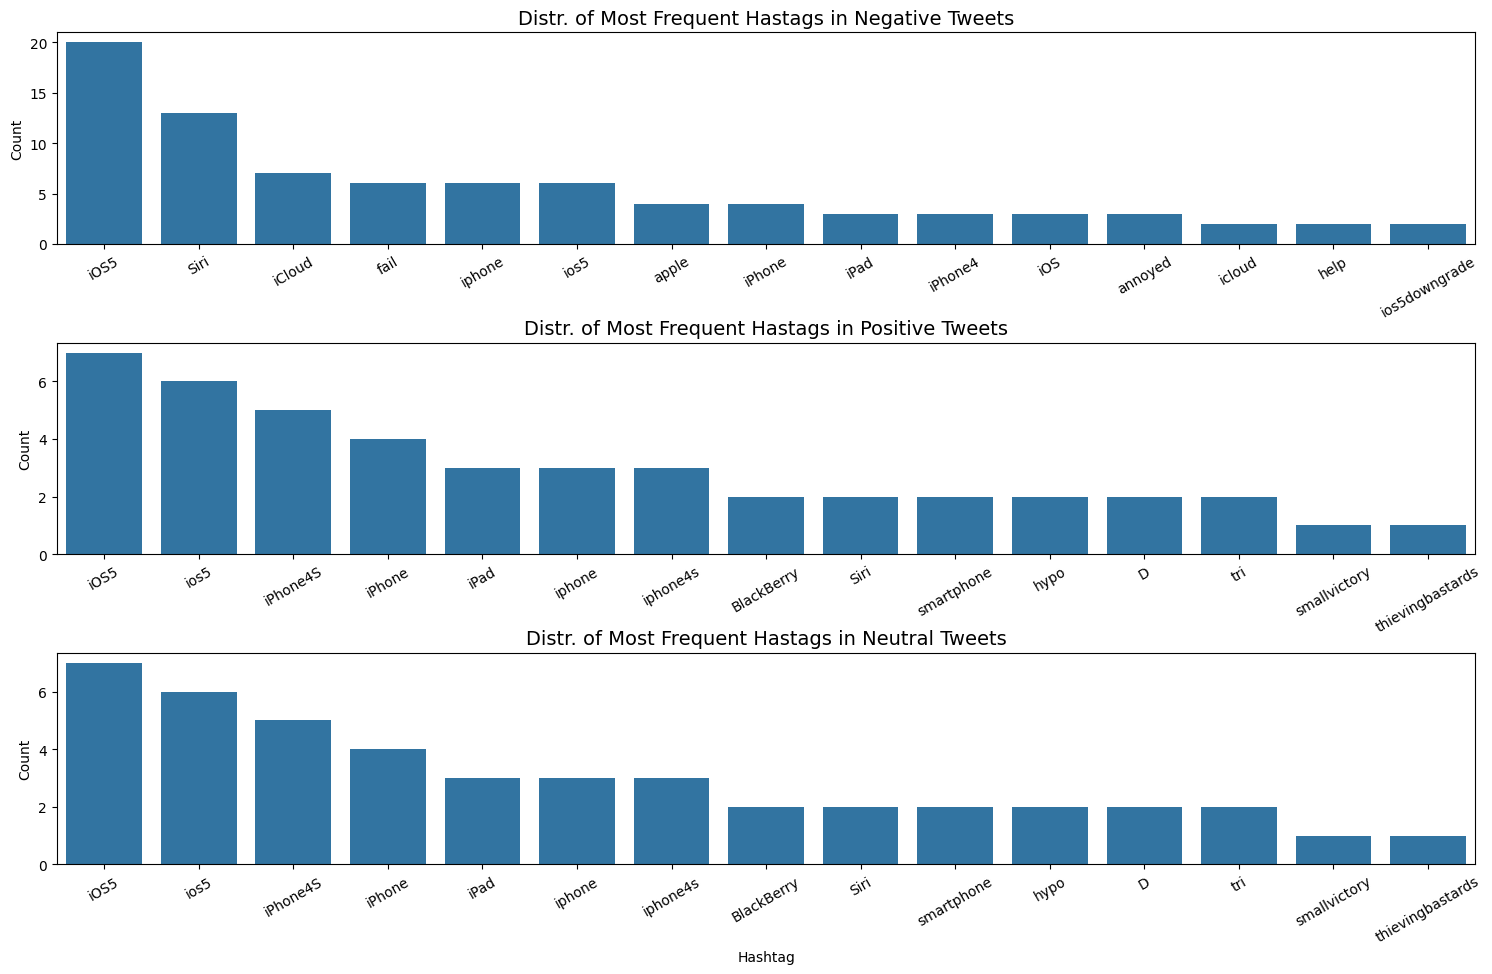

In [148]:
a_neg = nltk.FreqDist(hash_neg)
a_neu = nltk.FreqDist(hash_neu)
a_pos = nltk.FreqDist(hash_pos)

## Negative Tweets
df_neg = pd.DataFrame({'Hashtag': list(a_neg.keys()),
                'Count': list(a_neg.values())})

## Positive Tweets
df_pos = pd.DataFrame({'Hashtag': list(a_pos.keys()),
                'Count': list(a_pos.values())})

## Neutral Tweets
df_neu = pd.DataFrame({'Hashtag': list(a_neu.keys()),
                'Count': list(a_neu.values())})

# selecting top 15 most frequent hashtags     
df_neg = df_neg.nlargest(columns='Count', n=15) 
df_pos = df_pos.nlargest(columns='Count', n=15) 
df_neu = df_pos.nlargest(columns='Count', n=15)


## Plotting
fig, ax = plt.subplots(3, 1, figsize=(16, 10))
fig.tight_layout(pad=5)
plt.sca(ax[0])
sns.barplot(data=df_neg, x='Hashtag', y='Count')
plt.xticks(rotation=30)
plt.title('Distr. of Most Frequent Hastags in Negative Tweets', fontsize=14, c='k')
plt.xlabel('')
##
plt.sca(ax[1])
sns.barplot(data=df_pos, x='Hashtag', y='Count')
plt.xticks(rotation=30)
plt.title('Distr. of Most Frequent Hastags in Positive Tweets', fontsize=14, c='k')
plt.xlabel('')
##
plt.sca(ax[2])
sns.barplot(data=df_neu, x='Hashtag', y='Count')
plt.xticks(rotation=30)
plt.title('Distr. of Most Frequent Hastags in Neutral Tweets', fontsize=14, c='k')
plt.show()

In [149]:
## Remove unwanted text patterns from the tweets
def remove_pattern(input_txt: str, pattern: str):
    ''' This Function takes the input and pattern you want to remove

    Args:
    *****
        (input_text: str) --> The text you want to apply the function to it.
        (pattern: str) --> The pattern you want to remove from the text.
    '''
    input_txt = re.sub(pattern, '', input_txt)
    return input_txt

* `Remove Tags`

In [150]:
## Removing @user in tweets, and apply the function
# df['text'] = df['text'].apply(lambda x: remove_pattern(x, pattern=r'@[\w]*')) # same meaning
df['text'] = df['text'].apply(remove_pattern, pattern=r'@[\w]*')
df.head()

,class,text
0,Pos,Now all has to do is get swype on the iphone and it will be crack. Iphone that is
1,Pos,will be adding more carrier support to the iPhone 4S (just announced)
2,Pos,Hilarious video - guy does a duet with 's Siri. Pretty much sums up the love affair! http://t.co/8ExbnQjY
3,Pos,you made it too easy for me to switch to iPhone. See ya!
4,Pos,I just realized that the reason I got into twitter was ios5 thanks


* `remove Hyperlinks`

In [151]:
## An exmaple before removing links
df['text'].iloc[2]

"Hilarious  video - guy does a duet with  's Siri. Pretty much sums up the love affair! http://t.co/8ExbnQjY"

In [152]:
## Define a regular expression pattern to match URLs
## Apply the above function
df['text'] = df['text'].apply(remove_pattern, pattern=r'https?://\S+|www\.\S+')
df.head()

,class,text
0,Pos,Now all has to do is get swype on the iphone and it will be crack. Iphone that is
1,Pos,will be adding more carrier support to the iPhone 4S (just announced)
2,Pos,Hilarious video - guy does a duet with 's Siri. Pretty much sums up the love affair!
3,Pos,you made it too easy for me to switch to iPhone. See ya!
4,Pos,I just realized that the reason I got into twitter was ios5 thanks


In [153]:
## An exmaple After removing links
df['text'].iloc[2]

"Hilarious  video - guy does a duet with  's Siri. Pretty much sums up the love affair! "

* `remove repeated charchters`

In [154]:
## An exmaple before removing repeated chars
df['text'].iloc[210]

'RT : Oh just fuck you . Already?? ---&gt;  iPhone 5 on schedule for summer launch?  via '

In [155]:
def remove_excessive_repeated_characters(input_string, max_repeats=2):
    """A Function to remove excessive repeated chars while preserving correct words"""
    # Define a regular expression pattern to match consecutive repeated characters
    pattern = f"(\\w)\\1{{{max_repeats},}}"
    # Replace the matched pattern with a single occurrence of the character
    cleaned_string = re.sub(pattern, r"\1", input_string)
    
    return cleaned_string

In [156]:
## Apply the above function
df['text'] = df['text'].apply(remove_excessive_repeated_characters)
df.head()

,class,text
0,Pos,Now all has to do is get swype on the iphone and it will be crack. Iphone that is
1,Pos,will be adding more carrier support to the iPhone 4S (just announced)
2,Pos,Hilarious video - guy does a duet with 's Siri. Pretty much sums up the love affair!
3,Pos,you made it too easy for me to switch to iPhone. See ya!
4,Pos,I just realized that the reason I got into twitter was ios5 thanks


In [157]:
## An exmaple After removing repeated chars
df['text'].iloc[210]

'RT : Oh just fuck you . Already?? ---&gt;  iPhone 5 on schedule for summer launch?  via '

* `Emotions Mapping`

In [158]:
## Check on sample before mapping emotions
df['text'].iloc[34]

'At the bus with my iPhone ;) thxx '

In [159]:
## Convert Emojis to Text : example 😀 to Happy , 😢 Sad
## This Dataset doesn't contains emojis, but it contains emotioncons like that :D, :)
## So, We can't demojize, but we will map the moticons to its meaning.

emotion_meanings = {
    ":)": "Happy",
    ":(": "Sad",
    ":D": "Very Happy",
    ":|": "Neutral",
    ":O": "Surprised",
    "<3": "Love",
    ";)": "Wink",
    ":P": "Playful",
    ":/": "Confused",
    ":*": "Kiss",
    ":')": "Touched",
    "XD": "Laughing",
    ":3": "Cute",
    ">:(": "Angry",
    ":-O": "Shocked",
    ":|]": "Robot",
    ":>": "Sly",
    "^_^": "Happy",
    "O_o": "Confused",
    ":-|": "Straight Face",
    ":X": "Silent",
    "B-)": "Cool",
    "<(‘.'<)": "Dance",
    "(-_-)": "Bored",
    "(>_<)": "Upset",
    "(¬‿¬)": "Sarcastic",
    "(o_o)": "Surprised",
    "(o.O)": "Shocked",
    ":0": "Shocked",
    ":*(": "Crying",
    ":v": "Pac-Man",
    "(^_^)v": "Double Victory",
    ":-D": "Big Grin",
    ":-*": "Blowing a Kiss",
    ":^)": "Nosey",
    ":-((": "Very Sad",
    ":-(": "Frowning",
}


## Function to replace emotions with their meanings
def convert_emotions(text: str):
    ''' This Function is to replace the emotions with thier meaning instead 
    '''
    for emotion, meaning in emotion_meanings.items():
        text = text.replace(emotion, meaning)
    return text

## Apply the function on our dataset
df['text'] = df['text'].apply(convert_emotions)
df.head()

,class,text
0,Pos,Now all has to do is get swype on the iphone and it will be crack. Iphone that is
1,Pos,will be adding more carrier support to the iPhone 4S (just announced)
2,Pos,Hilarious video - guy does a duet with 's Siri. Pretty much sums up the love affair!
3,Pos,you made it too easy for me to switch to iPhone. See ya!
4,Pos,I just realized that the reason I got into twitter was ios5 thanks


In [160]:
## Check on sample After mapping emotions
df['text'].iloc[34]

'At the bus with my iPhone Wink thxx '

* `Removing Punctuations, Numbers and special chars`

In [161]:
## Removing Punctuations, Numbers, and Special Characters
df['text'] = df['text'].str.replace('[^a-zA-Z#]', ' ')
df.head()

,class,text
0,Pos,Now all has to do is get swype on the iphone and it will be crack. Iphone that is
1,Pos,will be adding more carrier support to the iPhone 4S (just announced)
2,Pos,Hilarious video - guy does a duet with 's Siri. Pretty much sums up the love affair!
3,Pos,you made it too easy for me to switch to iPhone. See ya!
4,Pos,I just realized that the reason I got into twitter was ios5 thanks


* `Removing short words`

In [162]:
## Removing Short Words
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if (len(w)>3)]))
df.head()

,class,text
0,Pos,swype iphone will crack. Iphone that
1,Pos,will adding more carrier support iPhone (just announced)
2,Pos,Hilarious video does duet with Siri. Pretty much sums love affair!
3,Pos,made easy switch iPhone.
4,Pos,just realized that reason into twitter ios5 thanks


* `Remove Numbers from Words`

In [163]:
## Call the above function (remove_pattern), We want to remove the numbers from words 
## We don't remove all numbers on the dataset, The pattern only removes the numbers within the words
df['text'] = np.vectorize(remove_pattern)(input_txt=df['text'], pattern='(?<=\w)\d+|\d+(?=\w)')
df.head()

,class,text
0,Pos,swype iphone will crack. Iphone that
1,Pos,will adding more carrier support iPhone (just announced)
2,Pos,Hilarious video does duet with Siri. Pretty much sums love affair!
3,Pos,made easy switch iPhone.
4,Pos,just realized that reason into twitter ios thanks


* `Remove Special Chars`

In [164]:
## An exmaple before removing special chars
df['text'].iloc[2]

'Hilarious video does duet with Siri. Pretty much sums love affair!'

In [165]:
## Define a regular expression pattern to match special characters
## Apply the function to the dataset
df['text'] = df['text'].apply(remove_pattern, pattern=r'[!@#$%^&*()_+{}\[\]:;<>,.?~\\|\/]')
df.head()

,class,text
0,Pos,swype iphone will crack Iphone that
1,Pos,will adding more carrier support iPhone just announced
2,Pos,Hilarious video does duet with Siri Pretty much sums love affair
3,Pos,made easy switch iPhone
4,Pos,just realized that reason into twitter ios thanks


In [166]:
## An exmaple After removing special chars
df['text'].iloc[2]

'Hilarious video does duet with Siri Pretty much sums love affair'

* `Rmeove Redundant words`

In [167]:
## An exmaple before solving that
df['text'].iloc[400]

"Dear convenienthandythoughtfulsmart that after iPhone ios update you're apps won't work anymore none grmbl"

In [168]:
## A Function to remove redundant words like (I've, You'll)
## Again, It is challenging
import nltk
nltk.download('stopwords')

def remove_redundant_words_extra_spaces(text: str):
    ## Remove contractions using regular expressions
    contraction_pattern = re.compile(r"'\w+|\w+'\w+|\w+'")
    text = contraction_pattern.sub('', text)

    ## Define a set of stopwords
    stop_words = set(stopwords.words("english"))

    ## Remove stopwords and extra spaces
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    clean_text = ' '.join(filtered_words)

    ## Remove extra spaces
    clean_text = ' '.join(clean_text.split())
    
    return clean_text


## Apply the above function
df['text'] = df['text'].apply(remove_redundant_words_extra_spaces)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\YUSSEF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [169]:
## An exmaple before solving that
df['text'].iloc[400]

'Dear convenienthandythoughtfulsmart iPhone ios update apps work anymore none grmbl'

* `Tokenization`

In [ ]:
## Tokenization
tokenized_tweet = df['text'].apply(lambda x: x.split()) 
tokenized_tweet.head()

In [ ]:
import nltk
nltk.download('wordnet')

## Lemmatization
lemmatizer = WordNetLemmatizer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x]) # lemmatizer
tokenized_tweet.head()

In [ ]:
## Join words again and append it to (dataset DF)
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
df['text'] = tokenized_tweet
df.head()

* `Some Viz`

In [ ]:
' '.join(df[df['class']=='Pos']['text'].astype(str))

In [ ]:
## For Positive Words
plt.figure(figsize=(20, 8))
wc = WordCloud(max_words=10000, width=1600, height=500, 
            collocations=False).generate(" ".join(df[df['class']=='Pos']['text'].astype(str)))
plt.title('Positve Words Visualization', fontsize=14, c='k')
plt.imshow(wc)
plt.show()

In [ ]:
## For Negative Words
plt.figure(figsize=(20, 8))
wc = WordCloud(max_words=10000, width=1600, height=500, 
            collocations=False).generate(" ".join(df[df['class']=='Neg']['text'].astype(str)))
plt.title('Negative Words Visualization', fontsize=14, c='k')
plt.imshow(wc)
plt.show()

In [ ]:
## For Neutral Words
plt.figure(figsize=(20, 8))
wc = WordCloud(max_words=10000, width=1600, height=500, 
            collocations=False).generate(" ".join(df[df['class']=='Neutral']['text'].astype(str)))
plt.title('Neutral Words Visualization', fontsize=14, c='k')
plt.imshow(wc)
plt.show()

* `Vectorization`

* `1- BOW`

In [ ]:
## Extracting Features from Cleaned Tweets using BOW 
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=None, stop_words='english')
X_bow = bow_vectorizer.fit_transform(df['text'])
X_bow = X_bow.toarray()
X_bow

In [85]:
# Dump the pipeline locally in ARTIFACTS_FOLDER_PATH
ARTIFACTS_FOLDER_PATH = os.path.join(os.getcwd(), '..', 'artifacts')
os.makedirs(ARTIFACTS_FOLDER_PATH, exist_ok=True)

In [ ]:
# Dump the pipeline locally --> Serialzation
joblib.dump(bow_vectorizer, os.path.join(ARTIFACTS_FOLDER_PATH, 'bow_vectorizer.pkl'))

`2. TF-IDF`

In [ ]:
## Extracting Features from Cleaned Tweets using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=None, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])
X_tfidf = X_tfidf.toarray()
X_tfidf

In [ ]:
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

---

* `Split the dataset`

In [ ]:
## mapping --> Some Algoritms can't handle non sequential encoding
dict_map = {'Neg': 0, 'Neutral': 1, "Pos": 2}    ## 0: Negative (still 0) || 4: Positive > 1 || 2: Neutral (still 2)
dict_rev_map = {v:k for k, v in dict_map.items()}

## Apply that to the dataset
df['target']= df['target'].map(dict_map)
df['target'].head()